In [1]:
import aniensemblestats as aes
import pandas as pd
import os

#import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/'
#errdir = '/home/jujuman/Research/DataReductionMethods/train_test/error_compare/'
tex_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/AllTests_results.tex"
xls_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/AllTests_results.xlsx"
#tex_store = "/home/jujuman/Research/DataReductionMethods/train_test/tables/AllTests_results.tex"
efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBank',
          'Tripeptide',
          'GDB07to09',
          'MDBenchmark',
          'GDB10to13',
          's66x8',
         ]
for i in efiles:
    print(i)

/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL6.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL3.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL5.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL1.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL2.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_AL4.h5
/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/tsdata_ANI-1.h5


In [11]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(xls_store, engine='xlsxwriter')

eed = aes.evaluate_ensemble_data(efiles)
# Build latex document
header = r'\documentclass{article}'+'\n'+r'\usepackage{booktabs}'+'\n'+r'\usepackage[margin=1.0in]{geometry}'+'\n'+r'\begin{document}'+'\n'

begtab = r'\begin{table}'+'\n'+r'\centering'+'\n'+r'\tiny'+'\n'
endtab = r'\end{table}'+'\n'
enddoc = r'\end{document}'
styles = []
with open(tex_store, "w") as text_file:
    text_file.write(header)
    print('Stats for: Complete benchmark')
    etab = eed.get_totalerror_table()
    styles.append(etab.style)
    text_file.write(begtab+r'\caption{Data set: Complete benchmark}'+'\n'+etab.to_latex(escape=False)+endtab)

    # Convert the dataframe to an XlsxWriter Excel object.
    etab.to_excel(writer, sheet_name="Complete Benchmark")

    for k in tsname:
        print('Stats for:',k)
        etab = eed.get_error_table(k)
        etab.to_excel(writer, sheet_name=k)
        styles.append(etab.style)
        text_file.write(begtab+r'\caption{Data set: '+k+r'}'+'\n'+etab.to_latex(escape=False)+endtab)
    text_file.write(enddoc)
styles[0]

# Close the Pandas Excel writer and output the Excel file.
writer.save()

Stats for: Complete benchmark
Stats for: DrugBank
Stats for: Tripeptide
Stats for: GDB07to09
Stats for: MDBenchmark
Stats for: GDB10to13
Stats for: s66x8


In [4]:
#eed.determine_min_error_by_sigma('6.0.0',
#                                 1.5, 98.0,
#                                 labelx=r'$\mathrm{\rho}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}}$]',
#                                 labely=r'$\mathrm{\mathcal{E}}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}$]',
#                                 xymax=(6.0,20.0),
#                                 figsize=(10.0, 8.0),
#                                 storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/rho_selection_6.0.0.pdf',
#                                 )

In [5]:
print(eed.get_net_keys())
#print(eed.get_size("9.0.5","MDBenchmark"))
#print(eed.get_size("9.0.4","Tripeptide"))
#print(eed.get_size("9.0.4","GDB07to09"))
#print(eed.get_size("9.0.4","GDB10to13"))

dict_keys(['AL6', 'AL2', 'AL5', 'AL3', 'AL1', 'ANI-1', 'AL4'])


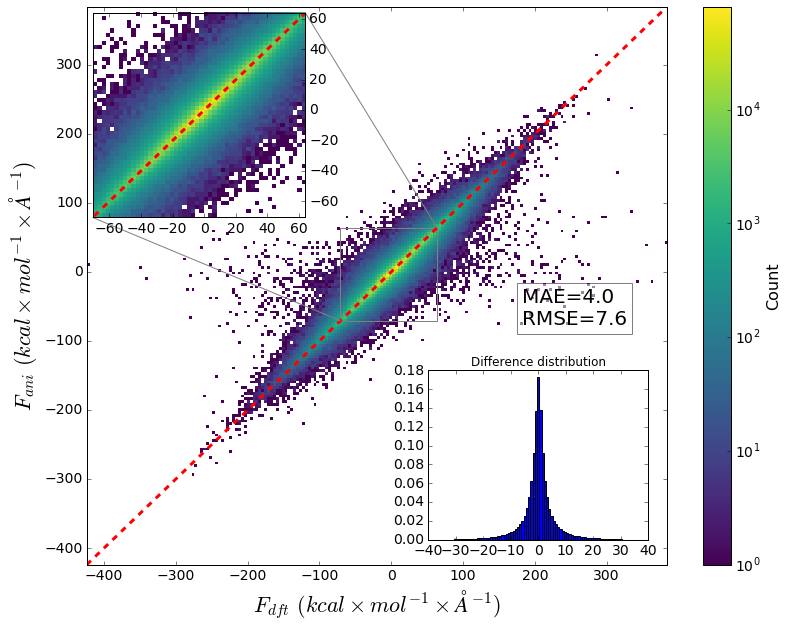

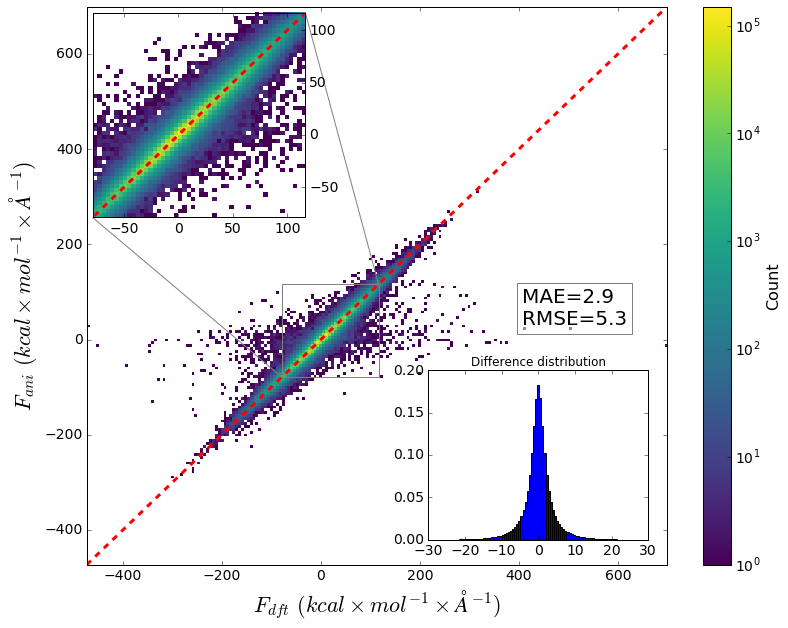

In [20]:
#eed.generate_correlation_plot('6.0.0','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('9.0.5','MDBenchmark','Fani','Fdft')
eed.generate_correlation_plot('ANI-1','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('AL6','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('ARC1','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('ARC8','MDBenchmark','Fani','Fdft')

In [7]:
#eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft',[0.0,23.0]),
#                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft',[0.0,12.0]),
#                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft',[0.0,10.0])], 
#                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 's66x8'],
#                         ntwks=['6.0.0','7.0.4','8.0.6','8.3.6','9.0.4','ANI-1'],
#                         fontsize=30, bbox_to_anchor=(0.3, 1.0), figsize=(40.0, 32.0), ncol=2, errortype='RMSE')

In [8]:
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf')

In [9]:
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='MAE',
                        storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_MAE.pdf')
#eed.generate_violin_distribution('GDB10to13')

In [10]:
'''
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['ARC1','ARC2','ARC3','ARC4','ARC5','ARC6','ARC7','ARC8'],
                        fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Research/DataReductionMethods/train_test/tables/figure_TSALvsANI_RMSE.pdf')
'''

"\need.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),\n                       (r'$\\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),\n                       (r'$F (kcal \times mol^{-1}\\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], \n                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],\n                         ntwks=['ARC1','ARC2','ARC3','ARC4','ARC5','ARC6','ARC7','ARC8'],\n                        fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE',\n                        storepath='/home/jujuman/Research/DataReductionMethods/train_test/tables/figure_TSALvsANI_RMSE.pdf')\n"